In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)

In [12]:
# Read hubble image, flag = 0 for reading as grayscale [0-255], 1 for BGR color
org_img = cv2.imread('./hubble_xdf.png',1)
img = cv2.imread('./hubble_xdf.png',0)

# Gaussian blur with a 11x11 gaussian kernel(matrix)
blurred = cv2.GaussianBlur(img, (11, 11), 0)

# Image thresholding, setting 130 as threshold, 255 as maxval 
thresh = cv2.threshold(blurred, 130, 255, cv2.THRESH_BINARY)[1]

# Idk yet, but this kinda removes smaller stuff and makes structures more structur-ly 
thresh = cv2.erode(thresh, None, iterations=3)
thresh = cv2.dilate(thresh, None, iterations=3)

# Find contours of threshold image
idk, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a red line for each contour with a copy of the original colored image
cnt = cv2.drawContours(org_img.copy(), contours, -1, (0,0,255), 6)

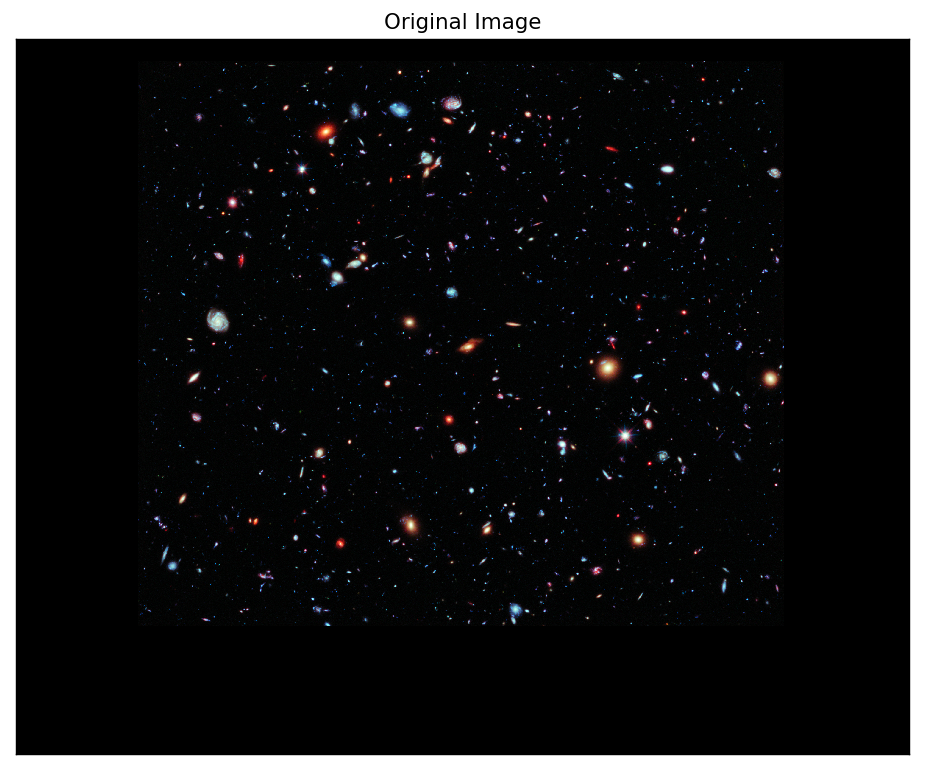

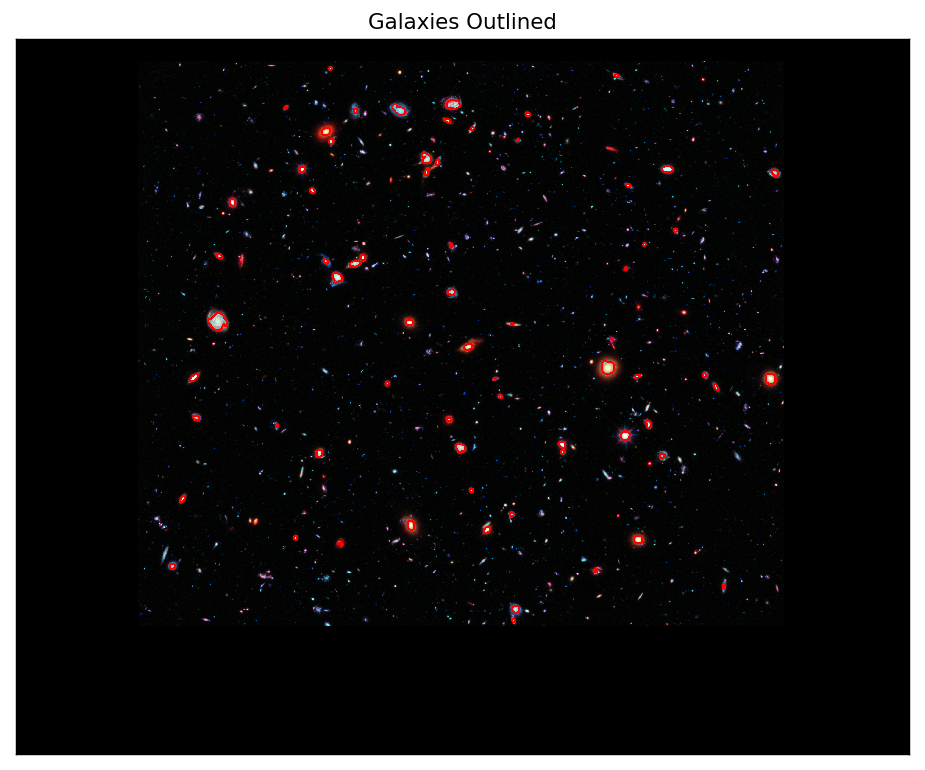

In [21]:
plt.figure(dpi=128)
plt.imshow(cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB),cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.figure(dpi=128)
plt.imshow(cv2.cvtColor(cnt, cv2.COLOR_BGR2RGB),cmap = 'gray')
plt.title('Galaxies Outlined'), plt.xticks([]), plt.yticks([])

plt.show()